In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [3]:
df=pd.read_csv('loan.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [5]:
list = ['Gender','Married','Education','Self_Employed','Property_Area','Dependents']

In [6]:
def category_var(dataframe,ls):
    for var in ls:
        dataframe[var] =  dataframe[var].astype('category')
    

In [7]:
category_var(df,list)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null category
Married              611 non-null category
Dependents           599 non-null category
Education            614 non-null category
Self_Employed        582 non-null category
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null category
Loan_Status          614 non-null object
dtypes: category(6), float64(4), int64(1), object(2)
memory usage: 37.9+ KB


In [9]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
category =['Gender','Married','Education','Self_Employed','Property_Area','Dependents','Credit_History']

for var in category:
    df[var].fillna(method='ffill',inplace=True)
    

In [11]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
numeric = ['LoanAmount','Loan_Amount_Term']

for var in numeric:
    mean = np.around(np.mean(df[var]),decimals=0)
    df[var].fillna(mean,inplace=True)

In [13]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

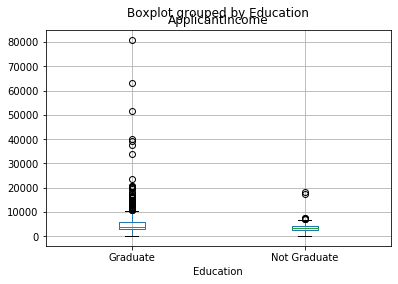

In [14]:
df.boxplot(column='ApplicantIncome',by='Education')

<Figure size 2160x360 with 0 Axes>

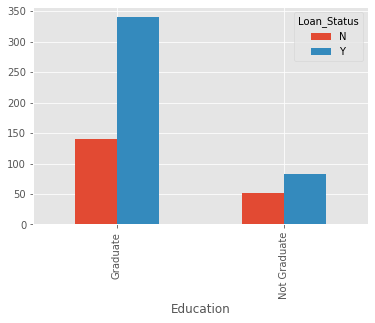

In [15]:
import matplotlib.pyplot as plt 
%matplotlib inline 

plt.figure(figsize=(30,5))
plt.style.use('ggplot')
pd.crosstab(df['Education'],df['Loan_Status']).plot.bar()

<Figure size 2160x360 with 0 Axes>

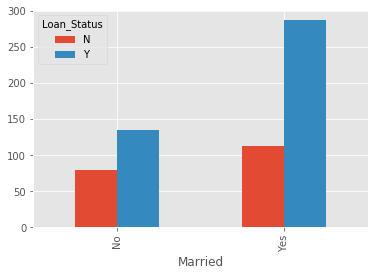

In [16]:
plt.figure(figsize=(30,5))
plt.style.use('ggplot')
pd.crosstab(df['Married'],df['Loan_Status']).plot.bar()

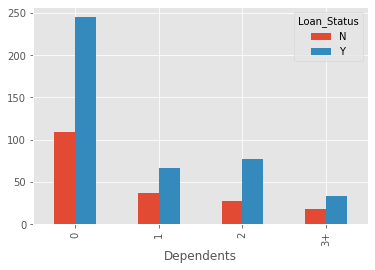

In [17]:
pd.crosstab(df['Dependents'],df['Loan_Status']).plot.bar()

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               614 non-null category
Married              614 non-null category
Dependents           614 non-null category
Education            614 non-null category
Self_Employed        614 non-null category
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null float64
Property_Area        614 non-null category
Loan_Status          614 non-null object
dtypes: category(6), float64(4), int64(1), object(2)
memory usage: 37.9+ KB


In [19]:
list = ['Gender','Married','Education','Self_Employed','Property_Area','Dependents']

In [20]:
def obj_var(dataframe,ls):
    for var in ls:
        dataframe[var] = dataframe[var].astype('object')

In [21]:
obj_var(df,list)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               614 non-null object
Married              614 non-null object
Dependents           614 non-null object
Education            614 non-null object
Self_Employed        614 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [23]:
df.drop(['Loan_ID'],inplace=True,axis=1)

In [24]:
df.Loan_Status.replace({'Y':1,'N':0},inplace = True)
df['Loan_Status'] = df.Loan_Status.astype(int)

In [25]:
train = pd.get_dummies(df,drop_first=True)

In [26]:
train.head(10)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,146.0,360.0,1.0,1,1,0,0,0,0,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,0,1,1,1,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,1,0,0,0,0,1,0,1
3,2583,2358.0,120.0,360.0,1.0,1,1,1,0,0,0,1,0,0,1
4,6000,0.0,141.0,360.0,1.0,1,1,0,0,0,0,0,0,0,1
5,5417,4196.0,267.0,360.0,1.0,1,1,1,0,1,0,0,1,0,1
6,2333,1516.0,95.0,360.0,1.0,1,1,1,0,0,0,1,0,0,1
7,3036,2504.0,158.0,360.0,0.0,0,1,1,0,0,1,0,0,1,0
8,4006,1526.0,168.0,360.0,1.0,1,1,1,0,1,0,0,0,0,1
9,12841,10968.0,349.0,360.0,1.0,0,1,1,1,0,0,0,0,1,0


In [27]:
from sklearn.impute import SimpleImputer

da =  SimpleImputer()
data = pd.DataFrame(da.fit_transform(train),columns=train.columns)

In [28]:
data.head(10)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,5849.0,0.0,146.0,360.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,4583.0,1508.0,128.0,360.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3000.0,0.0,66.0,360.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,2583.0,2358.0,120.0,360.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,6000.0,0.0,141.0,360.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,5417.0,4196.0,267.0,360.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
6,2333.0,1516.0,95.0,360.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
7,3036.0,2504.0,158.0,360.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
8,4006.0,1526.0,168.0,360.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
9,12841.0,10968.0,349.0,360.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 15 columns):
ApplicantIncome            614 non-null float64
CoapplicantIncome          614 non-null float64
LoanAmount                 614 non-null float64
Loan_Amount_Term           614 non-null float64
Credit_History             614 non-null float64
Loan_Status                614 non-null float64
Gender_Male                614 non-null float64
Married_Yes                614 non-null float64
Dependents_1               614 non-null float64
Dependents_2               614 non-null float64
Dependents_3+              614 non-null float64
Education_Not Graduate     614 non-null float64
Self_Employed_Yes          614 non-null float64
Property_Area_Semiurban    614 non-null float64
Property_Area_Urban        614 non-null float64
dtypes: float64(15)
memory usage: 72.0 KB


In [30]:
train.drop('Loan_Amount_Term', inplace= True, axis= 1)

In [31]:
NoCoapplicantIncome= np.where(train['CoapplicantIncome']== 0, 1, 0)

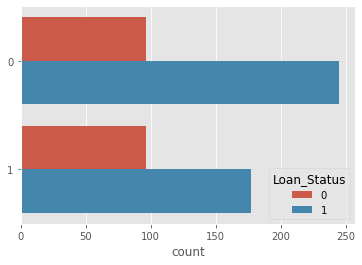

In [32]:
import seaborn as sns
sns.countplot(y=NoCoapplicantIncome, hue=train.Loan_Status)

In [33]:
ls =['CoapplicantIncome','LoanAmount','Credit_History','ApplicantIncome']

In [34]:
train.drop(ls,axis=1).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 10 columns):
Loan_Status                614 non-null int64
Gender_Male                614 non-null uint8
Married_Yes                614 non-null uint8
Dependents_1               614 non-null uint8
Dependents_2               614 non-null uint8
Dependents_3+              614 non-null uint8
Education_Not Graduate     614 non-null uint8
Self_Employed_Yes          614 non-null uint8
Property_Area_Semiurban    614 non-null uint8
Property_Area_Urban        614 non-null uint8
dtypes: int64(1), uint8(9)
memory usage: 10.3 KB


In [35]:
X, y = train.drop('Loan_Status', axis=1),train.Loan_Status

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=123, stratify= y)

In [37]:
from sklearn.linear_model import LogisticRegressionCV, SGDClassifier, LogisticRegression


logit= LogisticRegressionCV()
logit.fit(X_train, y_train)

logit_pred= logit.predict(X_test)

print(accuracy_score(y_test, logit_pred))

confusion_matrix(y_test, logit_pred)

0.7886178861788617


/home/deepak/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/home/deepak/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


array([[13, 25],
       [ 1, 84]])

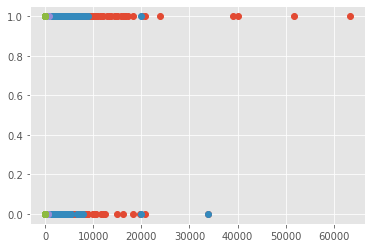

In [38]:
import matplotlib.pyplot as plt 

plt.plot(X_train, y_train,'o')